In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
df = pd.read_csv("C:/Users/Janak ARORA/Desktop/Ironhack_files/Week_5/Day1/mini_project/week5_project_ab_testing/data/cleaned/final_demo_cleaned.csv", sep=',')  # copy path
df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6,73,60,Unknown,2,45105.30,6,9
1,2304905,7,94,58,Unknown,2,110860.30,6,9
2,1439522,5,64,32,Unknown,2,52467.79,6,9
3,1562045,16,198,49,Male,2,67454.65,3,6
4,5126305,12,145,33,Female,2,103671.75,0,3
...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38,Unknown,3,1411062.68,5,5
70605,8981690,12,148,31,Male,2,101867.07,6,6
70606,333913,16,198,61,Female,2,40745.00,3,3
70607,1573142,21,255,68,Male,3,475114.69,4,4


In [4]:
df.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [5]:
df['clnt_tenure_yr'].unique()

array([ 6,  7,  5, 16, 12, 30, 15,  8,  4,  3, 10, 11, 13, 14, 19, 18, 25,
       23, 21, 17,  9, 27, 24, 20, 28, 22, 29, 46, 26, 32, 33, 35,  2, 38,
       31, 48, 34, 36, 51,  0, 47, 49, 37, 39, 40, 55, 42, 44, 43, 50, 54,
       41, 45, 52, 62])

# Are the primary clients new or long-standing?

In [35]:
# Define tenure buckets

bins = [-1, 3, 9, 19, df['clnt_tenure_yr'].max()]
labels = ["New (0–3)", 
          "Emerging (4–9)", 
          "Established (10–19)", 
          "Long-standing (20+)"
]

df["tenure_group"] = pd.cut(df['clnt_tenure_yr'], bins=bins, labels=labels)

tenure_summary = (df["tenure_group"].value_counts().sort_index().to_frame("count"))

tenure_summary["percentage"] = (
    tenure_summary["count"] / tenure_summary["count"].sum() * 100
).round(2)

print(tenure_summary)

                     count  percentage
tenure_group                          
New (0–3)              544        0.77
Emerging (4–9)       31091       44.03
Established (10–19)  27589       39.07
Long-standing (20+)  11385       16.12


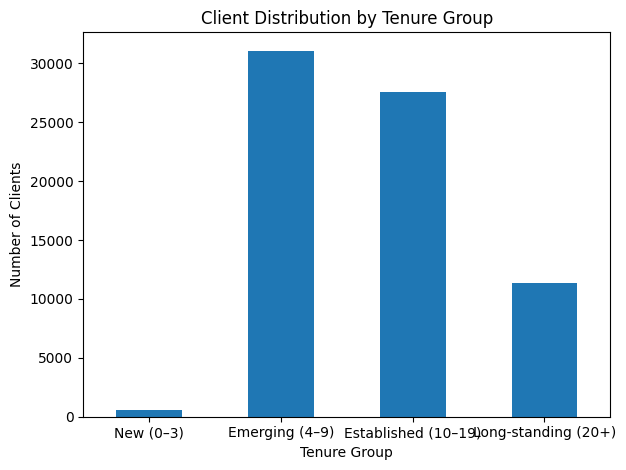

In [34]:
tenure_summary["count"].plot(kind="bar")

plt.title("Client Distribution by Tenure Group")
plt.xlabel("Tenure Group")
plt.ylabel("Number of Clients")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

# Client Behaviour Analysis

# Completion Rate: The proportion of users who reach the final 'confirm' step.

In [4]:
df_web_data = pd.read_csv("C:/Users/Janak ARORA/Desktop/Ironhack_files/Week_5/Day1/mini_project/week5_project_ab_testing/data/cleaned/cleaned_web_data.csv", sep=',')
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [5]:
# Completion Rate: The proportion of users who reach the final 'confirm' step.

# Total number of unique users who started the process
total_users = df_web_data["client_id"].nunique()

# Number of unique users who reached the final 'confirm' step
completed_users = df_web_data.loc[df_web_data["process_step"] == "confirm", "client_id"].nunique()

# Completion rate
completion_rate = completed_users / total_users

print(f"Completion Rate: {completion_rate:.2%}")

Completion Rate: 67.53%


In [6]:
# Completion rate by experiment group

df_exp = pd.read_csv("C:/Users/Janak ARORA/Desktop/Ironhack_files/Week_5/Day1/mini_project/week5_project_ab_testing/data/cleaned/experiment_clean.csv", sep=',')
df_exp

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [7]:
# Merge with web data
web_exp_merge = df_web_data.merge(df_exp, on="client_id", how="left")

completion_by_group = (
    web_exp_merge[web_exp_merge["process_step"] == "confirm"]
    .groupby("variation")["client_id"]
    .nunique()
    / web_exp_merge.groupby("variation")["client_id"].nunique()
)

print(completion_by_group)

variation
Control    0.655873
Test       0.692932
Name: client_id, dtype: float64


# Time Spent on Each Step: The average duration users spend on each step.

In [36]:
# Convert to datetime
df_web_data["date_time"] = pd.to_datetime(df_web_data["date_time"])

# Sort to ensure correct step order
df_web_data = df_web_data.sort_values(["client_id", "visit_id", "date_time"])

# Calculate time to next step within each session
df_web_data["next_time"] = df_web_data.groupby(["client_id", "visit_id"])["date_time"].shift(-1)

# Duration in seconds spent on each step
df_web_data["time_spent_sec"] = (df_web_data["next_time"] - df_web_data["date_time"]).dt.total_seconds()

# Compute average time per step
time_per_step = (
    df_web_data.dropna(subset=["time_spent_sec"])
       .groupby("process_step")["time_spent_sec"]
       .mean()
       .reset_index()
       .sort_values("time_spent_sec", ascending=False)
)

print(time_per_step)

  process_step  time_spent_sec
0      confirm      247.421603
4       step_3      132.068872
3       step_2       92.403757
2       step_1       60.377922
1        start       58.619549


# Error Rates: If there's a step where users go back to a previous step, it may indicate confusion or an error. 
### You should consider moving from a later step to an earlier one as an error.

In [37]:
step_order = [
    "start",
    "personal_info",
    "financial_info",
    "review",
    "confirm"
]

step_to_index = {step: idx for idx, step in enumerate(step_order)}

# Keep only known steps
df_web_data = df_web_data[df_web_data["process_step"].isin(step_order)].copy()

df_web_data["step_index"] = df_web_data["process_step"].map(step_to_index)

# Previous step index within the same session
df_web_data["prev_step_index"] = df_web_data.groupby(
    ["client_id", "visit_id"]
)["step_index"].shift(1)

# Backward movement = error
df_web_data["is_error"] = df_web_data["step_index"] < df_web_data["prev_step_index"]

error_rate = (
    df_web_data.groupby(["client_id", "visit_id"])["is_error"]
       .any()
       .mean()
)

print(f"Overall Error Rate: {error_rate:.2%}")

Overall Error Rate: 0.74%


# Adoption Rate (Used the online process atleast once)

In [38]:
# New clients = clients with tenure < 3 years

# Identify new clients
new_clients = df.loc[df["clnt_tenure_yr"] < 3, "client_id"].unique()

# New clients who used the online process
new_clients_online = df_web_data.loc[df_web_data["client_id"].isin(new_clients), "client_id"].nunique()

# Total number of new clients
total_new_clients = len(new_clients)

# Adoption rate
adoption_rate = new_clients_online / total_new_clients

print(f"Adoption Rate Among New Clients: {adoption_rate:.2%}")

Adoption Rate Among New Clients: 100.00%
